In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv("Desktop\Timeseries.csv", index_col=0)
df.head(10)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


In [3]:
df1 = df[(df['value'] >= df['value'].quantile(0.025)) | (df['value'] >= df['value'].quantile(0.975))]
df1

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [26]:
df1.index = pd.to_datetime(df1.index)

In [27]:
df1.index

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1271, freq=None)

In [28]:
# define a function
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    plt.figure(figsize= (14,20))

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date", fontsize = 10)
    ax.set_ylabel("Page Views", fontsize =10)
    ax.plot(df1.index, df1.value, linewidth = 1)

    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)

    # Save image and return fig 
    fig.savefig('line_plot.png')
    return fig


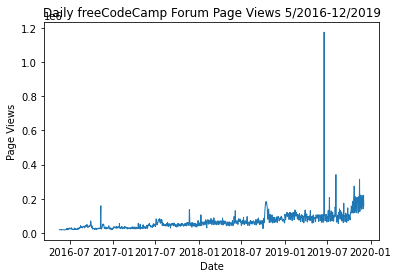

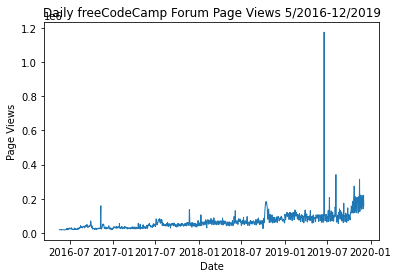

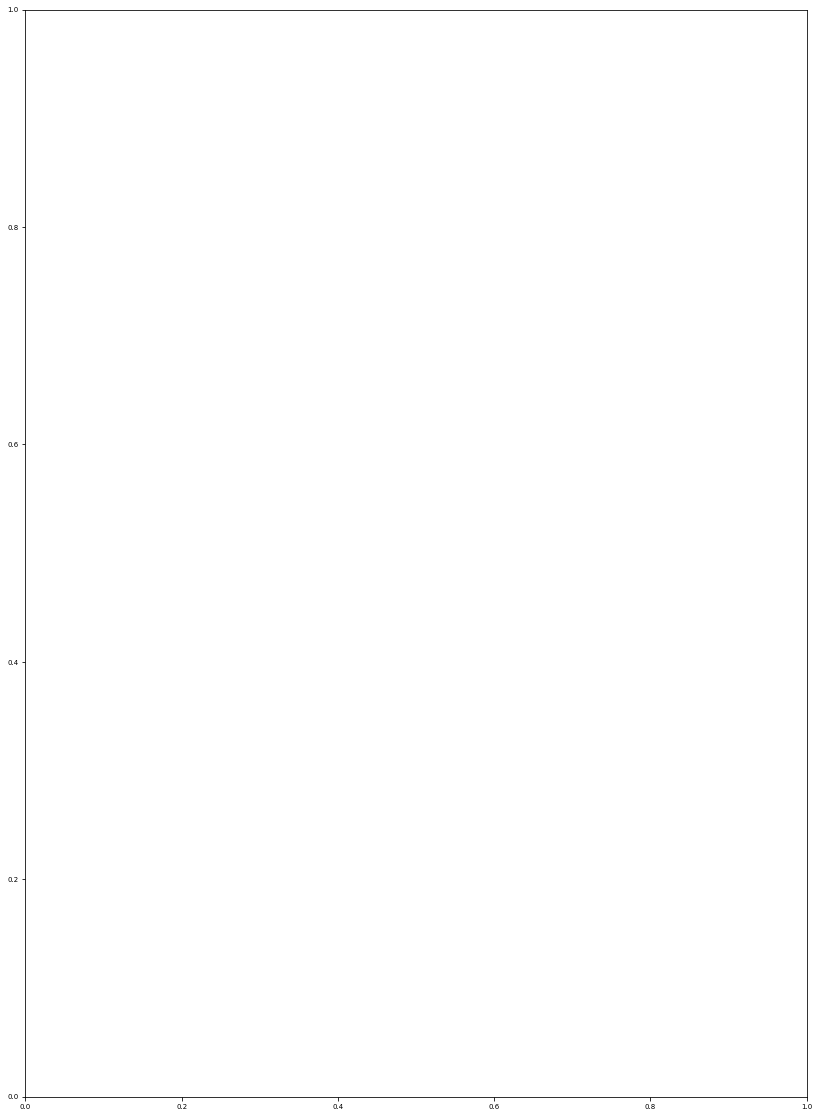

In [29]:
# call the function
draw_line_plot()

In [30]:
# create a function 
def draw_bar_plot():
    df1['year'] = df1.index.year
    df1['month'] = df1.index.month
    
    # Copy and modify data for monthly bar plot
    df_bar = df1.groupby(['year','month'])['value'].mean()
    df_bar = df_bar.unstack()
    # df_bar = df_bar.pivot(index='Date', columns=['year', 'month'], values='value')

    # Draw bar plot
    fig = df_bar.plot(figsize=(14,8), legend=True, kind='bar').figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    #ax = plt.subplots()
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    legend_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    plt.legend(legend_labels, loc='best')

    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig


C:\Users\adams\AppData\Local\Temp\ipykernel_23164\565566412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1.index.year
C:\Users\adams\AppData\Local\Temp\ipykernel_23164\565566412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1.index.month


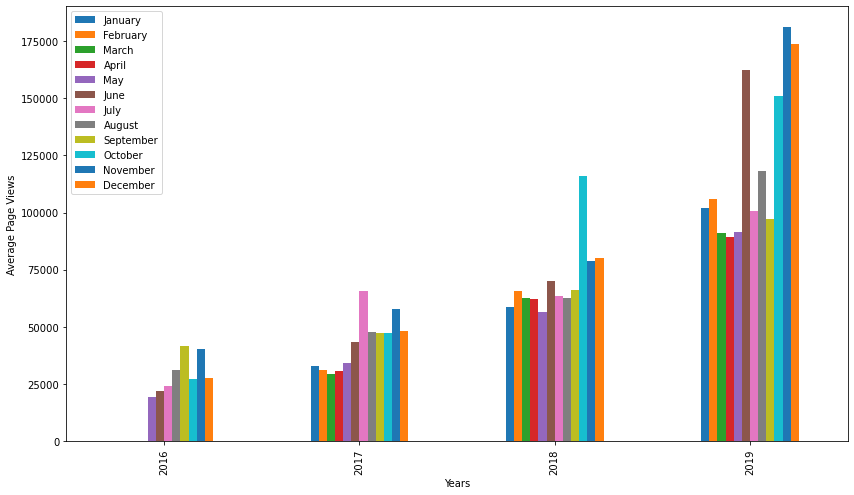

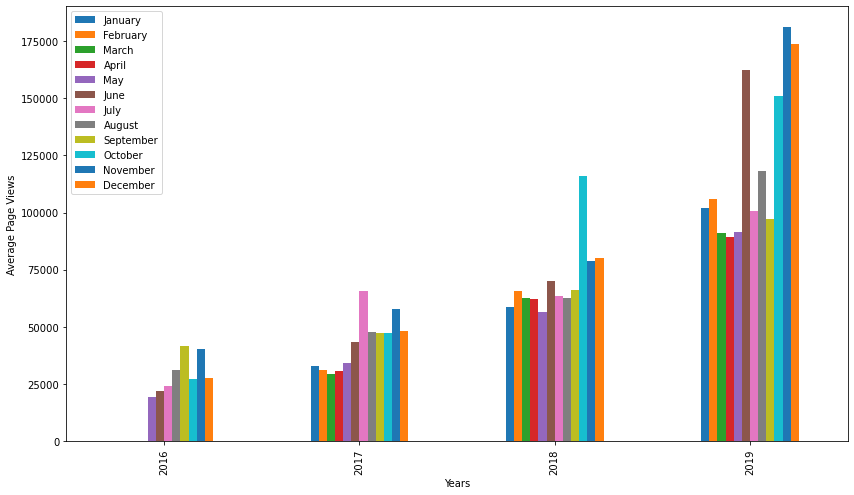

In [31]:
# call the function
draw_bar_plot()

In [24]:
# define a function
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['monthorder'] = df_box['date'].dt.month
    df_box = df_box.sort_values('monthorder')

    fig, ax = plt.subplots(ncols = 2, figsize=(10, 4))

    ax[0] = sns.boxplot(x= df_box['year'], y = df_box['value'], ax = ax[0])
    ax[1] = sns.boxplot(x= df_box['month'], y = df_box['value'], ax = ax[1])

    ax[0].set_title("Year-wise Box Plot (Trend)")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Page Views")

    ax[1].set_title("Month-wise Box Plot (Seasonality)")
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Page Views")

    # Save image and return fig 
    fig.savefig('box_plot.png')
    return fig

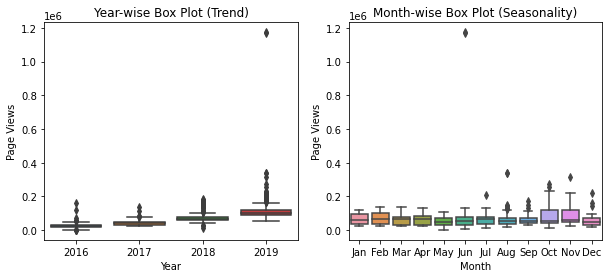

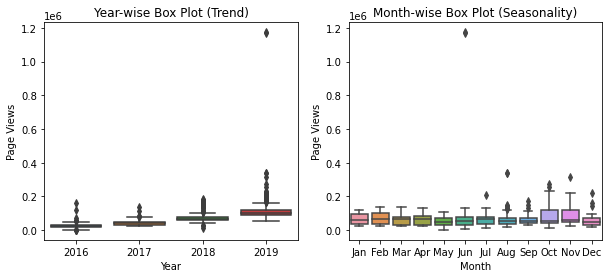

In [32]:
# call the function
draw_box_plot()